In [2]:
# Step 1: Import Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing the data

In [4]:
# Step 2: List of all CSV file paths
file_paths = [
    "Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv",
    "Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv",
    "Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv",
    "Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv",
    "Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv",
    "Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv",
    "Temperature_And_Precipitation_Cities_IN/Bhubhneshwar_1990_2022.csv",
]

# Step 3: Read and tag each dataset with a city label
dfs = []
for path in file_paths:
    df = pd.read_csv(path)
    city_name = os.path.basename(path).split("_")[0]  # Extract city name from file name
    df['city'] = city_name
    dfs.append(df)

# Step 4: Combine all datasets
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head()

,time,tavg,tmin,tmax,prcp,city,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,21.7,NaN,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,20.8,NaN,27.4,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
drop_columns = ['snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']
combined_df = combined_df.drop(columns=[col for col in drop_columns if col in combined_df.columns])

# Step 7: Fill missing values in prcp with 0
if 'prcp' in combined_df.columns:
    combined_df['prcp'] = combined_df['prcp'].fillna(0)

combined_df = combined_df.dropna()
# Step 5: Standardize column names
combined_df.columns = combined_df.columns.str.strip().str.lower()

In [6]:
combined_df.shape

(62837, 6)

In [7]:
combined_df.head()

,time,tavg,tmin,tmax,prcp,city
0,01-01-1990,22.9,19.1,28.4,0.0,Bangalore
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore
5,06-01-1990,20.4,17.1,24.2,0.0,Bangalore
7,08-01-1990,20.0,16.6,25.1,0.0,Bangalore


In [8]:
combined_df.tail()

,time,tavg,tmin,tmax,prcp,city
83294,31-08-2022,29.2,26.3,33.0,9.0,Bhubhneshwar
83295,01-09-2022,29.6,27.0,33.0,2.1,Bhubhneshwar
83296,02-09-2022,29.7,26.3,33.0,3.3,Bhubhneshwar
83297,03-09-2022,29.2,26.1,34.0,9.7,Bhubhneshwar
83298,04-09-2022,27.6,25.9,31.6,12.8,Bhubhneshwar


In [9]:
print(combined_df['city'].unique())

['Bangalore' 'Chennai' 'Delhi' 'Lucknow' 'Mumbai' 'Rajasthan'
 'Bhubhneshwar']


In [10]:
combined_df.isna().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
city    0
dtype: int64

In [11]:
combined_df.head(10)

,time,tavg,tmin,tmax,prcp,city
0,01-01-1990,22.9,19.1,28.4,0.0,Bangalore
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore
5,06-01-1990,20.4,17.1,24.2,0.0,Bangalore
7,08-01-1990,20.0,16.6,25.1,0.0,Bangalore
9,10-01-1990,21.2,15.0,27.7,0.0,Bangalore
10,11-01-1990,21.8,16.0,28.5,0.0,Bangalore
12,13-01-1990,18.8,11.2,27.2,0.0,Bangalore
13,14-01-1990,19.8,11.5,29.0,0.0,Bangalore
14,15-01-1990,21.0,11.5,30.3,0.0,Bangalore


In [12]:
# Step 8: Encode city names numerically
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(combined_df['city'])

# Create label mapping
city_mapping = {index: name for index, name in enumerate(le.classes_)}

# Now encode the column
combined_df['city'] = le.transform(combined_df['city'])

# Display mapping
print("City Encoding Map:")
for label, name in city_mapping.items():
    print(f"{label} → {name}")

# Step 9: Convert 'time' column to datetime (flexible for dd-mm-yyyy or yyyy-mm-dd)
combined_df['time'] = pd.to_datetime(combined_df['time'], format="%d-%m-%Y", errors='coerce')

# Step 10: Drop rows with invalid/missing dates
combined_df = combined_df.dropna(subset=['time'])

# Step 11: Extract useful date features
combined_df['month'] = combined_df['time'].dt.month
combined_df['day'] = combined_df['time'].dt.day
combined_df['year'] = combined_df['time'].dt.year

# Step 12: Preview cleaned data
combined_df.head()


City Encoding Map:
0 → Bangalore
1 → Bhubhneshwar
2 → Chennai
3 → Delhi
4 → Lucknow
5 → Mumbai
6 → Rajasthan


,time,tavg,tmin,tmax,prcp,city,month,day,year
0,1990-01-01,22.9,19.1,28.4,0.0,0,1,1,1990
2,1990-01-03,21.0,16.4,26.5,0.0,0,1,3,1990
4,1990-01-05,20.4,14.2,26.1,0.0,0,1,5,1990
5,1990-01-06,20.4,17.1,24.2,0.0,0,1,6,1990
7,1990-01-08,20.0,16.6,25.1,0.0,0,1,8,1990


In [13]:
print(combined_df['city'].unique())

[0 2 3 4 5 6 1]


In [14]:
combined_df.shape

(62837, 9)

In [15]:
combined_df.isna().sum()

time     0
tavg     0
tmin     0
tmax     0
prcp     0
city     0
month    0
day      0
year     0
dtype: int64

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62837 entries, 0 to 83298
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    62837 non-null  datetime64[ns]
 1   tavg    62837 non-null  float64       
 2   tmin    62837 non-null  float64       
 3   tmax    62837 non-null  float64       
 4   prcp    62837 non-null  float64       
 5   city    62837 non-null  int32         
 6   month   62837 non-null  int32         
 7   day     62837 non-null  int32         
 8   year    62837 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(4)
memory usage: 3.8 MB


# Exploratory Data Analysis

In [18]:
# Summary statistics
combined_df.describe(include='all')

,time,tavg,tmin,tmax,prcp,city,month,day,year
count,62837,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000
mean,2007-07-06 23:29:06.518770688,25.789156,20.708945,31.831177,3.452560,2.950014,6.461432,15.737320,2007.018031
min,1990-01-01 00:00:00,5.700000,-0.600000,9.800000,0.000000,0.000000,1.000000,1.000000,1990.000000
25%,1999-07-01 00:00:00,22.900000,18.000000,29.000000,0.000000,1.000000,3.000000,8.000000,1999.000000
50%,2008-02-27 00:00:00,26.200000,21.000000,31.800000,0.000000,3.000000,6.000000,16.000000,2008.000000
75%,2016-01-11 00:00:00,29.100000,24.800000,34.700000,0.000000,5.000000,10.000000,23.000000,2016.000000
max,2022-09-04 00:00:00,39.800000,34.200000,48.100000,470.900000,6.000000,12.000000,31.000000,2022.000000
std,NaN,4.663216,5.243747,4.509561,14.128822,2.054923,3.471921,8.784033,9.505816


### Distribution of Average Temperature

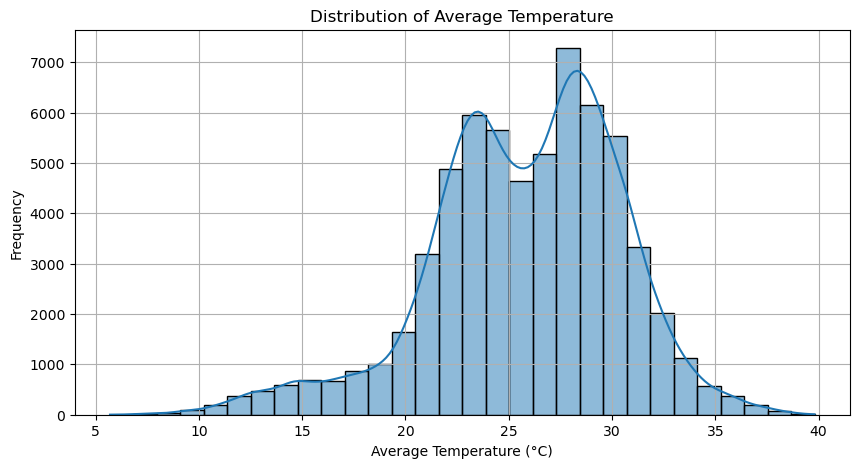

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(combined_df['tavg'], bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### City-wise Average temperature

C:\Users\USER\AppData\Local\Temp\ipykernel_19684\69516469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='tavg', data=combined_df, palette='tab10')


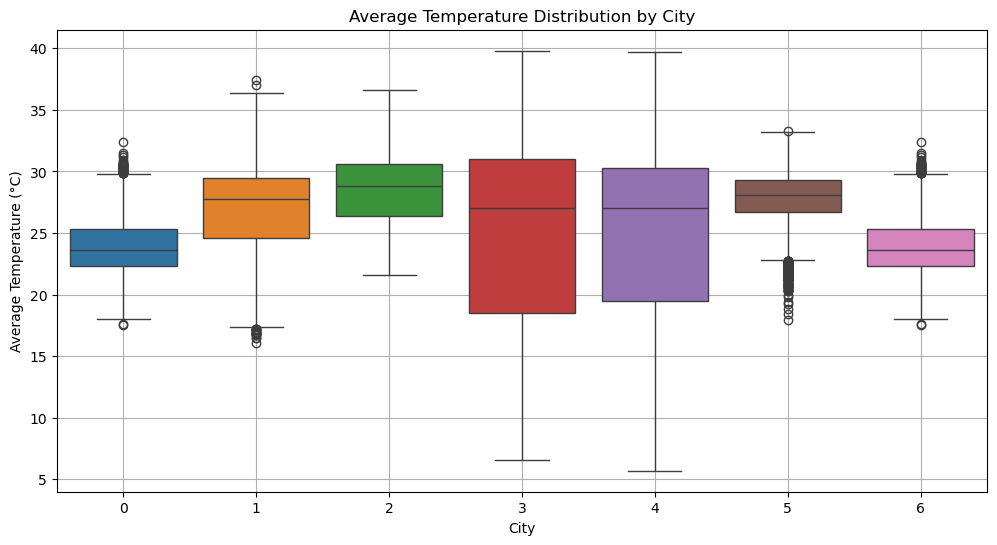

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='tavg', data=combined_df, palette='tab10')
plt.title("Average Temperature Distribution by City")
plt.xlabel("City")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

# City Encoding Map:
# 0 → Bangalore
# 1 → Bhubhneshwar
# 2 → Chennai
# 3 → Delhi
# 4 → Lucknow
# 5 → Mumbai
# 6 → Rajasthan


### Temperature trends over the years

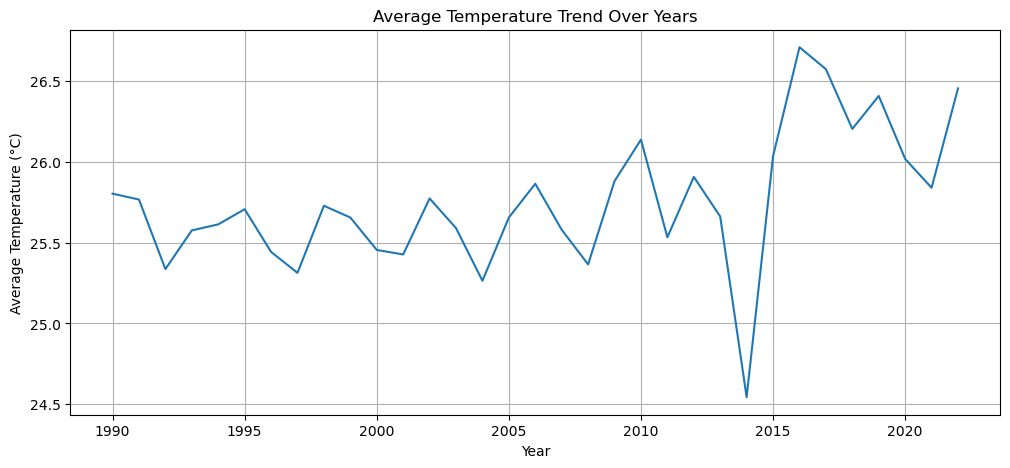

In [24]:
avg_temp_by_year = combined_df.groupby('year')['tavg'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='tavg', data=avg_temp_by_year)
plt.title("Average Temperature Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()


### Monthly Rainfall Pattern

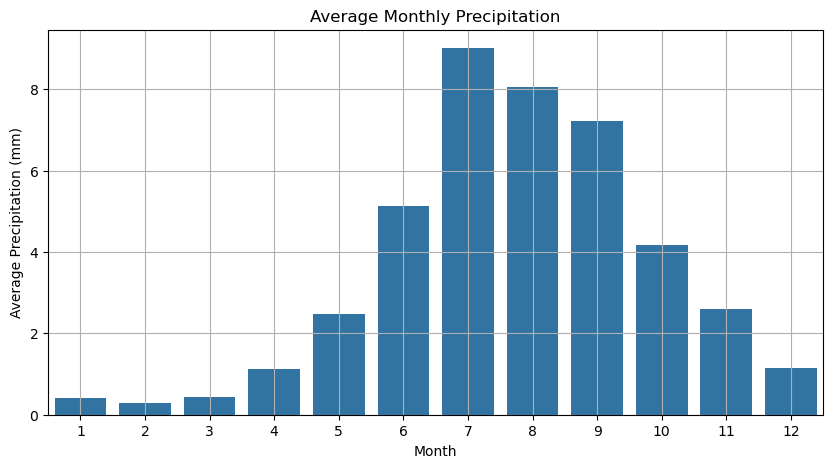

In [26]:
monthly_rain = combined_df.groupby('month')['prcp'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='prcp', data=monthly_rain)
plt.title("Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm)")
plt.grid(True)
plt.show()


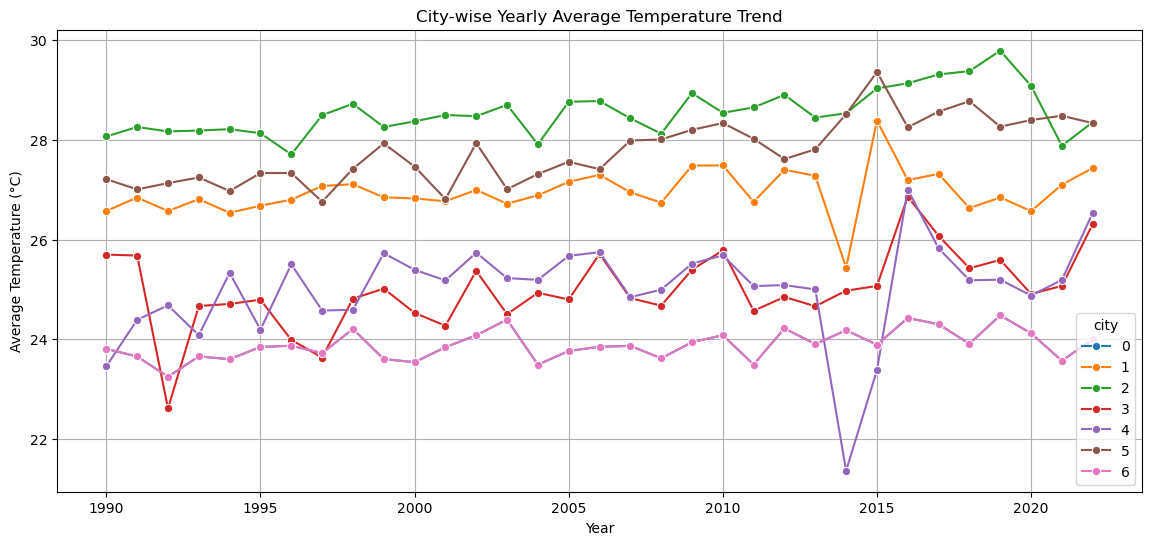

In [27]:
city_year_avg = combined_df.groupby(['year', 'city'])['tavg'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=city_year_avg, x='year', y='tavg', hue='city', marker='o', palette='tab10')
plt.title("City-wise Yearly Average Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()



# Model training

In [29]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define features and target
features = ['tmin', 'tmax', 'prcp', 'city', 'month', 'day']
target = 'tavg'

# Create X and y
X = combined_df[features]
y = combined_df[target]

# Same train-test split for all models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Empty dictionaries to collect results
model_predictions = {}
model_scores = {}


## Linear Regression

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Store outputs
model_predictions['Linear Regression'] = lr_preds
model_scores['Linear Regression'] = {
    "MAE": mean_absolute_error(y_test, lr_preds),
    "RMSE": np.sqrt(mean_squared_error(y_test, lr_preds)),
    "R² Score": r2_score(y_test, lr_preds)
}

## SVR

In [34]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

# Store outputs
model_predictions['SVR'] = svr_preds
model_scores['SVR'] = {
    "MAE": mean_absolute_error(y_test, svr_preds),
    "RMSE": np.sqrt(mean_squared_error(y_test, svr_preds)),
    "R² Score": r2_score(y_test, svr_preds)
}


## Random Forest Regressor

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Store outputs
model_predictions['Random Forest'] = rf_preds
model_scores['Random Forest'] = {
    "MAE": mean_absolute_error(y_test, rf_preds),
    "RMSE": np.sqrt(mean_squared_error(y_test, rf_preds)),
    "R² Score": r2_score(y_test, rf_preds)
}

## XGBoost

In [38]:
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Store outputs
model_predictions['XGBoost'] = xgb_preds
model_scores['XGBoost'] = {
    "MAE": mean_absolute_error(y_test, xgb_preds),
    "RMSE": np.sqrt(mean_squared_error(y_test, xgb_preds)),
    "R² Score": r2_score(y_test, xgb_preds)
}


In [39]:
results_df = pd.DataFrame(model_scores).T
print("🔍 Model Evaluation Summary:\n")
display(results_df)
model_predictions


🔍 Model Evaluation Summary:



,MAE,RMSE,R² Score
Linear Regression,0.677301,0.909123,0.961428
SVR,0.643710,0.876709,0.964130
Random Forest,0.564632,0.777921,0.971758
XGBoost,0.556640,0.753116,0.973530


{'Linear Regression': array([29.44835543, 24.65214455, 27.85855887, ..., 25.06585582,
        30.01532853, 20.30210844]),
 'SVR': array([29.61171605, 24.68410862, 28.19923946, ..., 25.19010507,
        30.3407396 , 20.2165687 ]),
 'Random Forest': array([29.546 , 24.269 , 28.241 , ..., 24.927 , 29.789 , 19.7045]),
 'XGBoost': array([29.585833, 24.402372, 28.124418, ..., 24.477528, 30.151735,
        20.235008], dtype=float32)}

In [40]:
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(f"R² on Train: {r2_train:.4f}")
print(f"R² on Test : {r2_test:.4f}")


R² on Train: 0.9766
R² on Test : 0.9735


### As R² on train is NOT much higher than test, we are not likely overfitting.

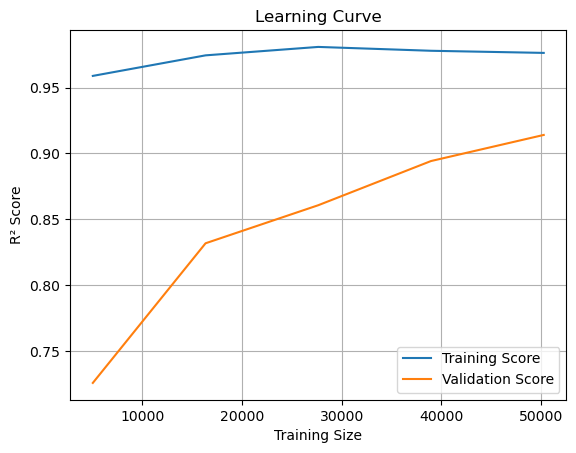

In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
   xgb_model, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19684\4046703932.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


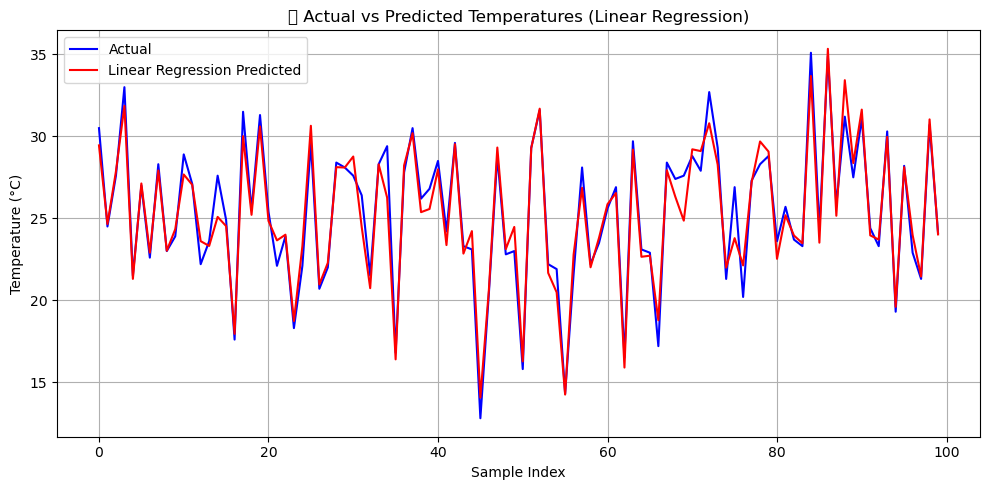

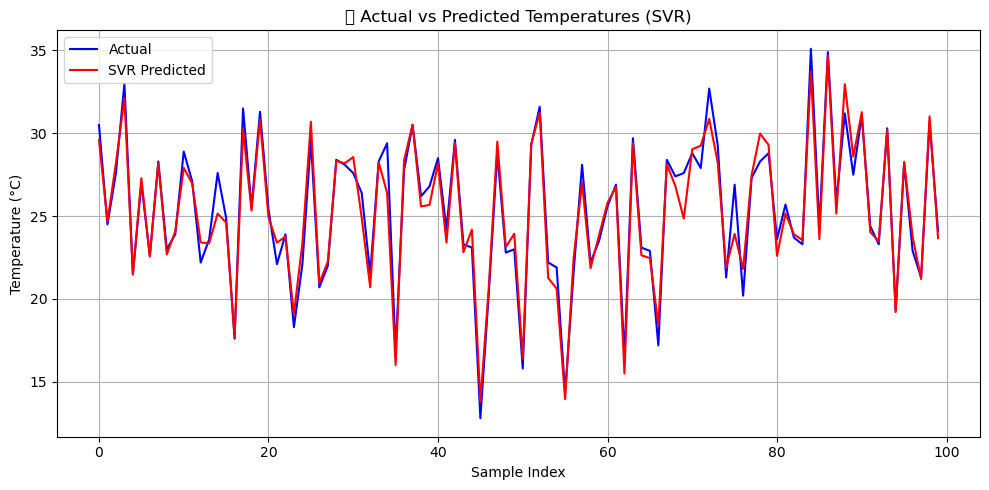

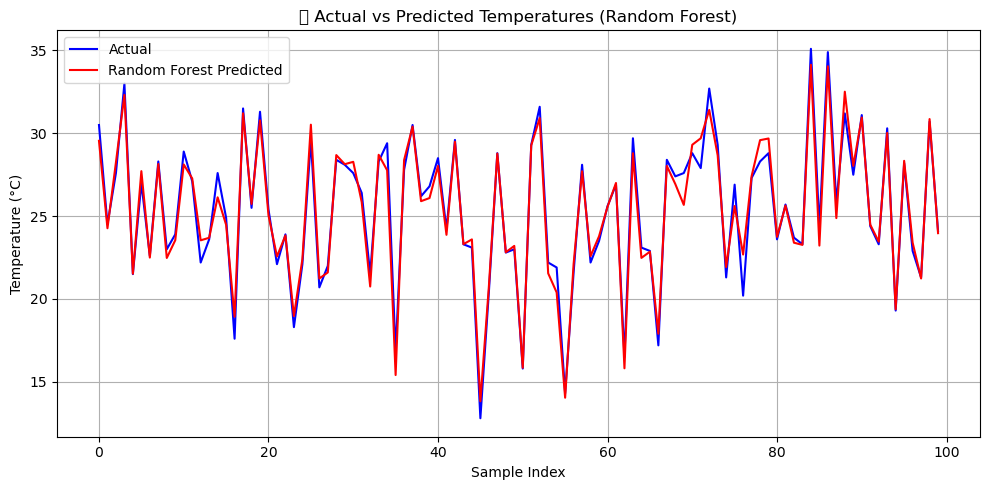

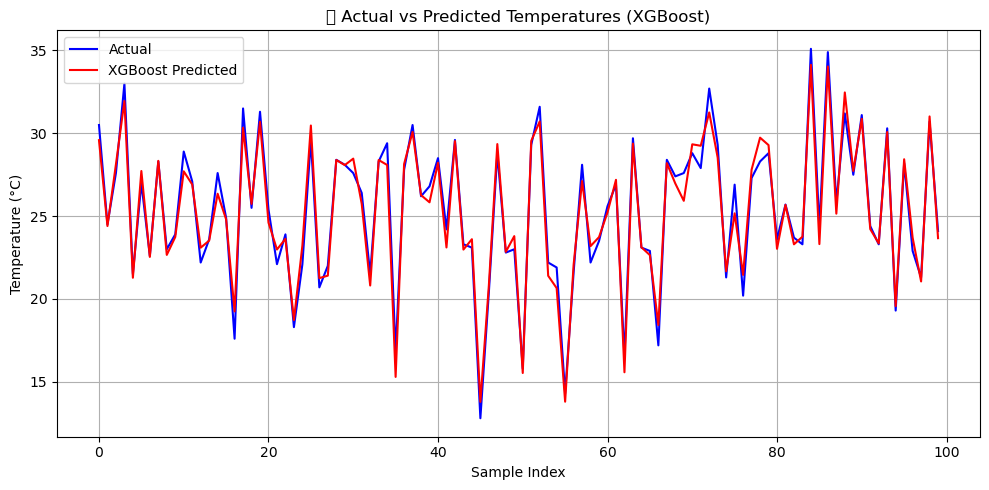

In [43]:
import matplotlib.pyplot as plt

# Convert y_test to NumPy array if it's a Series
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test

# Loop through each model and plot
for name, preds in model_predictions.items():
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_array[:100], label='Actual', color='blue')  # First 100 points for clarity
    plt.plot(preds[:100], label=f'{name} Predicted', color='red')
    plt.title(f'📈 Actual vs Predicted Temperatures ({name})')
    plt.xlabel('Sample Index')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


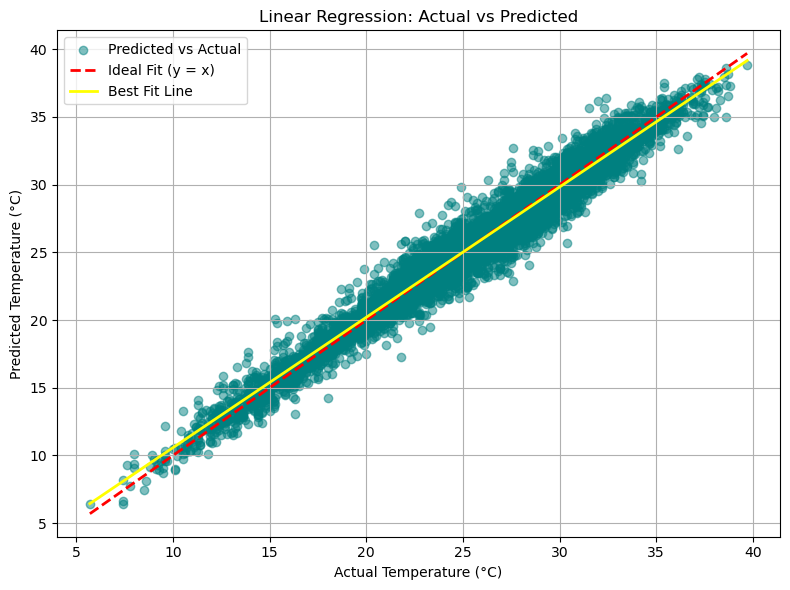

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Actual values (true) and predicted values (from model)
actual = y_test.values if hasattr(y_test, 'values') else y_test
predicted = model_predictions['Linear Regression']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, alpha=0.5, color='teal', label='Predicted vs Actual')

# Best-fit (ideal prediction) line: y = x
plt.plot([min(actual), max(actual)],
         [min(actual), max(actual)],
         color='red', linestyle='--', linewidth=2,
         label='Ideal Fit (y = x)')

# Optional: Fit a regression line to predicted vs actual (to visualize model bias)
lr_fit_line = LinearRegression()
lr_fit_line.fit(actual.reshape(-1, 1), predicted)
pred_line = lr_fit_line.predict(np.array([min(actual), max(actual)]).reshape(-1, 1))
plt.plot([min(actual), max(actual)],
         pred_line,
         color='yellow', linestyle='-', linewidth=2,
         label='Best Fit Line')

# Labels & Title
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


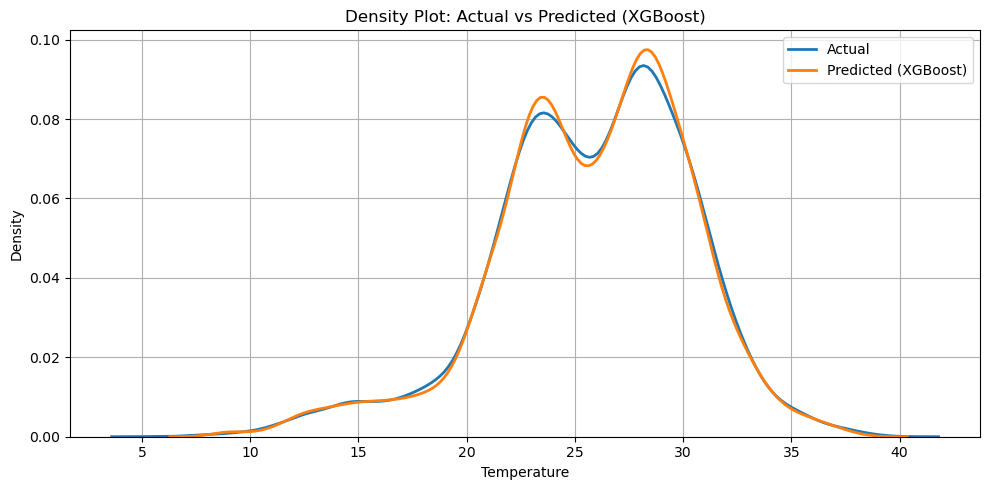

In [45]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, label="Actual", linewidth=2)
sns.kdeplot(model_predictions['XGBoost'], label="Predicted (XGBoost)", linewidth=2)
plt.title("Density Plot: Actual vs Predicted (XGBoost)")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


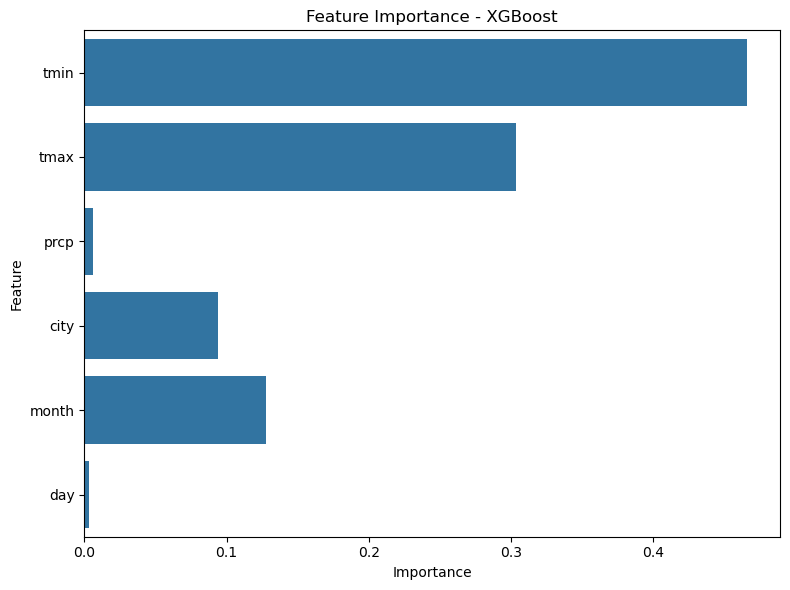

In [46]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [47]:
import pickle

# Save models
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))
pickle.dump(rf_model, open("rf_model.pkl", "wb"))
pickle.dump(lr_model, open("lr_model.pkl", "wb"))
pickle.dump(svr_model, open("svr_model.pkl", "wb"))
